In [4]:
using JuLIP
include("../src/JuLIPMaterials.jl")
MST = JuLIPMaterials
BCC = JuLIPMaterials.BCC;

# Preliminary Tests

In [6]:
at = BCC.cell_111(:Fe)
# looks correct
# JuLIP.Visualise.show(at)
;

In [7]:
using PyPlot
plot(at) = plot3D(mat(at.X)[1, :], mat(at.X)[2, :], mat(at.X)[3, :], "b.", markersize=12)

plot (generic function with 1 method)

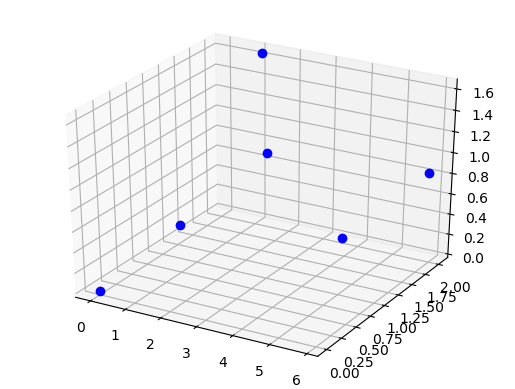

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13b8e5cc0>

In [8]:
plot(at)

In [15]:
S = :Fe
a0 = rnn(S)
Rdom = 10.1 * a0
Rfree = 8.1 * a0 
#at = BCC.screw_111(S, Rdom)
data = Pkg.dir("JuLIP") * "/data/"
at = BCC.screw_111(:Fe, Rdom, layers=2, calc=JuLIP.Potentials.EAM(data * "pfe.plt", data * "ffe.plt", data * "F_fe.plt"))
#calc = StillingerWeber()
# looks correct 
# JuLIP.Visualise.show(at) 
#;
# [2] boundary condition 
#Ifree = find(MST.dists(positions(at), [1,2]) .<= Rfree)
set_constraint!(at, JuLIP.Constraints.AntiPlaneFixedCell(at))

LoadError: [91mUndefVarError: dists not defined[39m

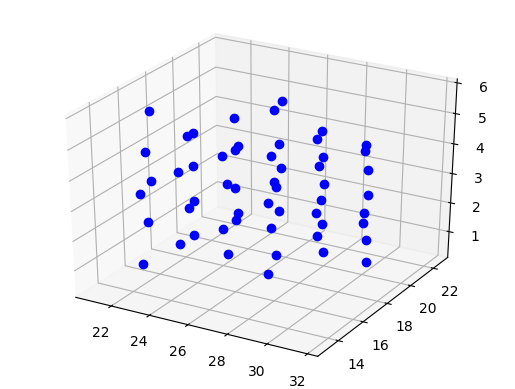

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13bab4390>

In [14]:
plot(at)

# Test: Equilibrate a Screw Dislocation

this looks like it is working as expected, EXCEPT that the optimiser seems to pass through several "almost minima"; this indicates that we might have lost the symmetry we were hoping for!

In [5]:
# setup a proper simulation 
# =========================
# [1] Cell 
S = "Fe"
a0 = rnn(S)
Rdom = 10.1 * a0
Rfree = 8.1 * a0 
at = BCC.screw_111(S, Rdom)
# [2] boundary condition 
Ifree = find(MST.dists(positions(at), [1,2]) .<= Rfree)
set_constraint!(at, JuLIP.Constraints.AntiPlaneFixedCell(at, free=Ifree))
# [3] Calculator 
data = Pkg.dir("JuLIP") * "/data/"
set_calculator!(at, JuLIP.Potentials.EAM(data * "pfe.plt", data * "ffe.plt", data * "F_fe.plt"))
# [3] optimise 
JuLIP.Solve.minimise!(at, verbose=2)
;

Iter     Function value   Gradient norm 
     0    -3.159257e+00     5.105621e-02
     1    -3.346965e+00     3.996494e-02
     2    -3.363416e+00     4.293154e-02
     3    -3.422337e+00     5.263564e-02
     4    -3.453205e+00     7.828143e-02
     5    -3.563570e+00     5.726105e-02
     6    -3.644795e+00     4.457191e-02
     7    -3.675462e+00     5.369827e-02
     8    -3.735243e+00     2.545110e-02
     9    -3.748870e+00     2.076536e-02
    10    -3.757886e+00     1.516183e-02
    11    -3.765352e+00     1.418780e-02
    12    -3.771110e+00     1.508002e-02
    13    -3.775718e+00     9.687410e-03
    14    -3.779002e+00     9.073279e-03
    15    -3.781693e+00     1.579933e-02
    16    -3.784735e+00     7.503339e-03
    17    -3.786457e+00     1.039602e-02
    18    -3.788533e+00     7.524816e-03
    19    -3.789885e+00     7.825381e-03
    20    -3.791275e+00     7.732399e-03
    21    -3.791877e+00     1.120856e-02
    22    -3.793019e+00     6.486234e-03
    23    -3.794

In [7]:
# JuLIP.Visualise.show(at)